IPSuite uses [DVC](https://dvc.org) to manage its files and workflows. In this part we will fit different GAP models to our data and compare them.

In [1]:
import ipsuite as ips

2024-04-18 14:33:00,817 (DEBUG): Welcome to IPS - the Interatomic Potential Suite!


In [2]:
with ips.Project() as project:
    data = ips.AddData(file="KCl1650K.extxyz", lines_to_read=100)
    test_data = ips.configuration_selection.UniformEnergeticSelection(
        data=data.atoms, n_configurations=10, name="test_data"
    )
    # we have now given the Nodes a "name" attribute to uniquly identify them
    train_data = ips.configuration_selection.RandomSelection(
        data=data.atoms,
        n_configurations=5,
        exclude_configurations=test_data.exclude_configurations,
        name="train_data",
    )
    model = ips.models.GAP(data=train_data.atoms, OPENBLAS_NUM_THREADS="1")
    prediction = ips.analysis.Prediction(model=model, data=test_data.atoms)
    analyse = ips.analysis.PredictionMetrics(data=prediction)
project.run()


Running DVC command: 'stage add --name PredictionMetrics --force ...': 100%|██████████████████████████████████| 6/6 [00:00<00:00,  7.53it/s]
Running DVC command: 'repro'


2024-04-18 14:33:03,333 (DEBUG): Welcome to IPS - the Interatomic Potential Suite!


Reading File: 100it [00:00, 483.17it/s]


2024-04-18 14:33:05,852 (DEBUG): Welcome to IPS - the Interatomic Potential Suite!
2024-04-18 14:33:06,076 (DEBUG): Selecting from 100 configurations.
2024-04-18 14:33:06,076 (WARNING): Running search for 10 to max 100
2024-04-18 14:33:07,696 (DEBUG): Welcome to IPS - the Interatomic Potential Suite!
2024-04-18 14:33:08,026 (DEBUG): Selecting from 100 configurations.
2024-04-18 14:33:09,592 (DEBUG): Welcome to IPS - the Interatomic Potential Suite!
2024-04-18 14:33:09,735 (INFO): ---- Writing the GAP input file ----
2024-04-18 14:33:09,970 (INFO): --- Training model ---
2024-04-18 14:33:12,702 (DEBUG): Welcome to IPS - the Interatomic Potential Suite!


100%|█████████████████████████████████| 10/10 [00:00<00:00, 11.72it/s]


2024-04-18 14:33:16,082 (DEBUG): Welcome to IPS - the Interatomic Potential Suite!


We can now invesitage our Model.

In [3]:
analyse = analyse.from_rev()
print(analyse.energy)
print(analyse.forces)

{'rmse': 1.2024685909515438, 'mse': 1.445930712224991, 'mae': 0.6862250732141547, 'max': 3.1921669917646796, 'lp4': 0.32654229429364423, 'rrmse': 0.031294498248751974}
{'rmse': 71.1206008463576, 'mse': 5058.139864746922, 'mae': 54.90239384710718, 'max': 269.7693781588422, 'lp4': 0.5538384557609273, 'rrmse': 0.18851364878310337}


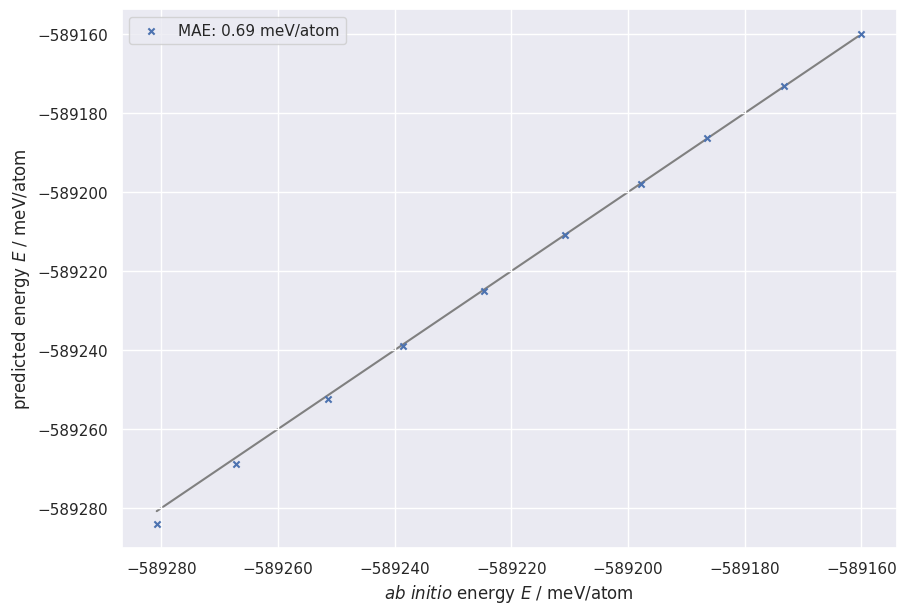

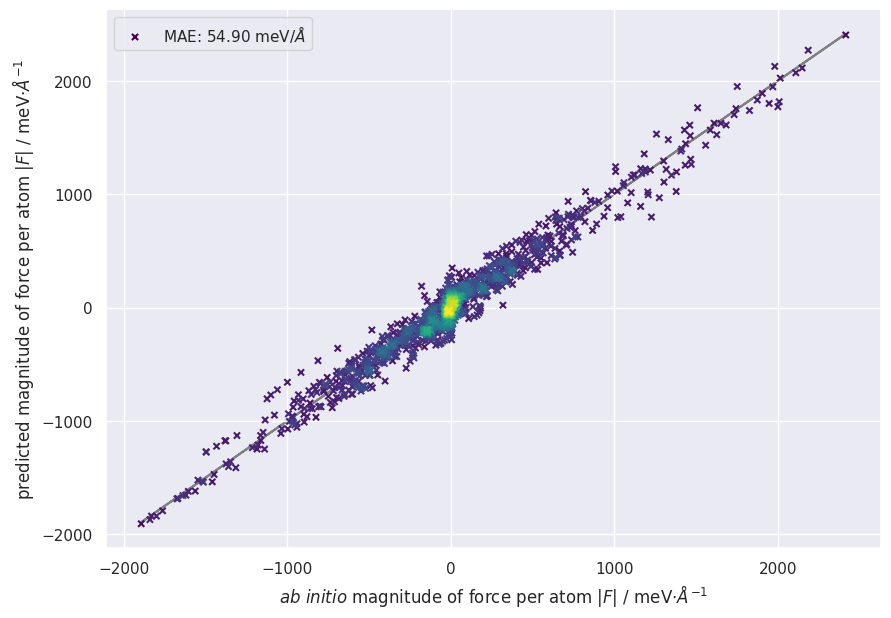

In [4]:
analyse.get_plots()

We can use `dvc dag --mermaid` to display the graph that was created for us:

[![](https://mermaid.ink/img/pako:eNpdkdFKwzAUhl-lnOtt2Lm20AtBnFdbQfRC0IiE5tQG0mSkp7o69u6edV1Xe3fy_X8OH8kBcqcQUiiM-8lL6SnYPgsryDIO3wXcK7WWJAV8XOjyRK00bY1PHpXOSTs7ym853zyYMI5uNgvc0779XajvfNRYcSPbZjyZEY2Y9gtfNZXTOOaYvNT2U_33SU4B1jTl4Xx-112cgmQw7UE4iPUgGpx6sBwspo2kB6spiGEGFfpKasXPexA2CNizxAoFpDwqLGRjSICwR642O9bHR6XJeUjJNzgD2ZB7aW1-OZ87ay2_vKwgLaSpme6kfXPuesZuR3b-1u53j3-xQ6q3?type=png)](https://mermaid.live/edit#pako:eNpdkdFKwzAUhl-lnOtt2Lm20AtBnFdbQfRC0IiE5tQG0mSkp7o69u6edV1Xe3fy_X8OH8kBcqcQUiiM-8lL6SnYPgsryDIO3wXcK7WWJAV8XOjyRK00bY1PHpXOSTs7ym853zyYMI5uNgvc0779XajvfNRYcSPbZjyZEY2Y9gtfNZXTOOaYvNT2U_33SU4B1jTl4Xx-112cgmQw7UE4iPUgGpx6sBwspo2kB6spiGEGFfpKasXPexA2CNizxAoFpDwqLGRjSICwR642O9bHR6XJeUjJNzgD2ZB7aW1-OZ87ay2_vKwgLaSpme6kfXPuesZuR3b-1u53j3-xQ6q3)

If we want to train our model on a different amount of training data, we can modify the `train_data` Node.
This will only rerun nodes that are dependent on the `train_data` Node. In our case, this means that the `test_data` Node won't be affect and we can ensure, that all models are evaluated on the same test data.

To compare `experiments` we need to create them first.

In [5]:
with project.create_experiment(name="baseline") as exp1 :
    # this will store the current experiment with the name "baseline"
    pass

with project.create_experiment() as exp2:
    train_data.n_configurations = 10

with project.create_experiment() as exp3:
    train_data.n_configurations = 3

project.run_exp()

Running DVC command: 'stage add --name AddData --force ...':   0%|                                                    | 0/6 [00:00<?, ?it/s]

Running DVC command: 'stage add --name PredictionMetrics --force ...': 100%|██████████████████████████████████| 6/6 [00:00<00:00,  9.06it/s]
Running DVC command: 'stage add --name PredictionMetrics --force ...': 100%|██████████████████████████████████| 6/6 [00:00<00:00,  9.62it/s]
Running DVC command: 'stage add --name PredictionMetrics --force ...': 100%|██████████████████████████████████| 6/6 [00:00<00:00,  7.18it/s]
Running DVC command: 'exp run --run-all --jobs 1'


Now let's have a look at the results. We can load the Experiments using `exp.load` followed by `exp.nodes['node-name']` or  via `Node.from_rev(rev=<name>)`.

In [6]:
for exp in [exp3, exp1, exp2]:
    exp.load()
    print(f"'{exp.name}': {exp['train_data'].n_configurations = }")

'gutta-veep': exp['train_data'].n_configurations = 3
'baseline': exp['train_data'].n_configurations = 5
'sulky-gaur': exp['train_data'].n_configurations = 10


In [7]:
print(analyse.from_rev(rev=exp3.name).energy)
print(analyse.from_rev(rev=exp1.name).energy)
print(analyse.from_rev(rev=exp2.name).energy)

{'rmse': 0.8934967365069562, 'mse': 0.798336418148581, 'mae': 0.5106975476257503, 'max': 2.454832173534669, 'lp4': 0.2482885578094188, 'rrmse': 0.023253440685511693}
{'rmse': 1.3976198541271143, 'mse': 1.9533412566502963, 'mae': 0.727601655072067, 'max': 3.9621493491576985, 'lp4': 0.399737742123205, 'rrmse': 0.03637335096028674}
{'rmse': 1.2079931352168587, 'mse': 1.4592474147310557, 'mae': 0.6358391704969109, 'max': 3.4046803136589006, 'lp4': 0.3439634476547724, 'rrmse': 0.03143827567640124}


You can also use the CLI `dvc exp show` to compare your experiments.


To make these Experiments persistent and store them inside your GIT repository there are multiple options:
- you can use `dvc exp branch <exp> <branch>` and push that branch to your remote.
- you can use `dvc exp apply <exp>` and commit the experiment and push to your remote.

To store all experiments, you can make temporary branches using `dvc exp branch` and then consecutively merge them into the branch you want them to be stored in.

In [8]:
# We want to remove the experiments here, so we can rerun the Notebook.
!dvc exp remove -A

Removed experiments: 'gutta-veep', 'baseline' and 'sulky-gaur'        
